## Creating qircuits

In [6]:
from qiskit import QuantumCircuit

In [13]:
def create_quantum_circuit():
    qc = QuantumCircuit(3, 3)
    # measure qubits 0...2 to cbits (classical bits) 0...2
    qc.measure(
        [0, 1, 2], # qubits
        [0, 1, 2], # cbits
    )
    
    return qc

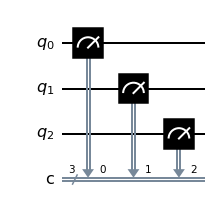

In [14]:
qc = create_quantum_circuit()
qc.draw(output="mpl")

Currently, we still use classical computers to simulate how a quantum circuit will behave when run. Simulating a quantum computer is a difficult problem (TODO: see actual complexity class), we can only simulate small quantum circuits or those with special properties that lends to optimization. This also explains why quantum circuit optimization techniques is a growing area of research. ZX-calculus, tensor networks, etc. are some examples of those optimization techniques.

An interesting question is that are the techniques of quantum many-body systems utilized in the development of quantum hardware and/or quantum circuit simulators? This could be a good area of (personal) research in the future.

## Simulating a qircuit

In [16]:
from qiskit.providers.aer import AerSimulator

In [17]:
sim = AerSimulator()

In [18]:
job = sim.run(qc)

In [19]:
result = job.result()

In [20]:
result.get_counts()

{'000': 1024}

## Encoding bits

In [21]:
qc = QuantumCircuit(3, 3)
qc.x([0, 1])

In [22]:
qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])

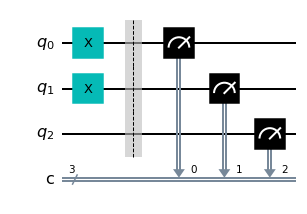

In [23]:
qc.draw(output="mpl")

In [24]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'011': 1024}

## Adder qircuit

### Half adder

In [34]:
qc = QuantumCircuit(4, 2)
qc.x([0, 1])
qc.barrier()
# Define operation for the half-adder here
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)
qc.barrier()
qc.measure([2, 3], [0, 1])

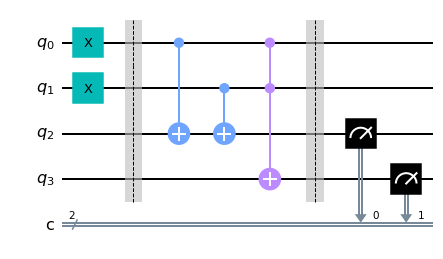

In [35]:
qc.draw(output="mpl")

Mathematically, the CNOT or CX gate performs `A XOR B` for `qc.cx(A, B)`.

The first CX gate does `A XOR 0 = A`.<br>
The second CX gate then does `B XOR A = A XOR B`.

When adding 2 bits, the thing we want to accomplish with this qircuit, the first bit of the result (from the right) is `A XOR B`. (See the table below, the inputs are padded with 0s on the left).

| A | B | A + B |
| --- | --- | --- |
| 00 | 00 | 00 |
| 01 | 00 | 01 |
| 00 | 01 | 01 |
| 01 | 01 | 10 |

For the second bit, we need something that would return 1 when both A **and** B are 1 - essentially an `AND` gate. There is a gate that exactly does this, the Toffoli gate. It's like the CX gate but with 2 control bits and 1 output bit. It's implemented via `qc.ccx()`.


In [36]:
job = sim.run(qc)
result = job.result()
print("Result: ", result.get_counts())

Result:  {'10': 1024}


To test for the other possible inputs, we rewrite the above into a function:

In [37]:
def add_via_qircuit_half_adder(bit1: int, bit2: int, sim):
    qc = QuantumCircuit(4, 2)
    if bit1:
        qc.x(0)
    if bit2:
        qc.x(1)

    qc.barrier()
    # Define operation for the half-adder here
    qc.cx(0, 2)
    qc.cx(1, 2)
    qc.ccx(0, 1, 3)
    qc.barrier()
    qc.measure([2, 3], [0, 1])
    
    # Draw the qircuit just to check
    qc.draw(output="mpl")
    
    job = sim.run(qc)
    result = job.result()
    return result.get_counts()

In [41]:
print(f"0 + 0 = {add_via_qircuit_half_adder(0, 0, sim)}")
print(f"0 + 1 = {add_via_qircuit_half_adder(0, 1, sim)}")
print(f"1 + 0 = {add_via_qircuit_half_adder(1, 0, sim)}")
print(f"1 + 1 = {add_via_qircuit_half_adder(1, 1, sim)}")

0 + 0 = {'00': 1024}
0 + 1 = {'01': 1024}
1 + 0 = {'01': 1024}
1 + 1 = {'10': 1024}


We have verified that our implementation of the half adder works!

Here's a list of things worth exploring:
* How could we extend the half adder to arbitrary-length bit strings?
* How does the CNOT/CX gate work?
* How does the Toffoli/CCX gate work?
* How does the `AerSimulator` work? Specifically what happens when the `AerSimulator.run()` is called?